# **Pluralsight Take Home Challenge**
Justin Chong
#### In this Take-Home challenge we will be analyzing and building a model based on the given training dataset of 800 people that include various individuals' health information. We will be predicting the Zeta Disease infection on the Mars Colony. We will use the training dataset provided to train the model and use the prediction dataset for our predicted results. 

## Importing the Dependencies and Packages

In [845]:
### Import Packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## Reading in Datasets

In [846]:
### Reading Datasets
zeta_train = pd.read_excel('recruiting_zeta-disease_training-data_take-home-challenge.xlsx')
zeta_pred = pd.read_excel('recruiting_zeta-disease_prediction-data_take-home-challenge (1).xlsx')
zeta_pred

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN
5,45,120,36.5,108,50,1.2978,54,12,NaN
6,20,139,38.2,61,77,1.5818,68,3,NaN
7,23,137,31.2,70,73,1.4168,59,7,NaN
8,36,195,30.5,59,141,1.4498,59,6,NaN
9,19,193,25.8,84,66,1.7938,50,3,NaN


## Explatory Data Analysis (EDA) 

In [847]:
### Exploring through the data for General Info and Data Quality Issues
print(zeta_train.head())
print(zeta_train.info())
print(zeta_train.shape)



   age  weight   bmi  blood_pressure  insulin_test  liver_stress_test  \
0   54     189  27.1              80             0             1.5038   
1   23     150  38.5              68            71             0.3868   
2   47     186  29.9              90             0             0.2728   
3   18     150  30.8              70          1033             0.6598   
4   24     160  32.4              74           125             0.7608   

   cardio_stress_test  years_smoking  zeta_disease  
0                   0             10             0  
1                  55              2             0  
2                   0              7             0  
3                  56              0             0  
4                  59              2             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    

In [848]:
print(zeta_train.describe())

              age      weight         bmi  blood_pressure  insulin_test  \
count  800.000000  800.000000  800.000000      800.000000    800.000000   
mean    30.985000  172.407500   32.201625       69.565000     85.887500   
std     13.824025   31.942438    8.549155       19.874784    126.333656   
min     18.000000   94.000000    0.000000        0.000000      0.000000   
25%     21.000000  149.000000   27.300000       62.000000      0.000000   
50%     26.000000  167.000000   32.050000       72.000000     45.000000   
75%     38.000000  192.000000   36.525000       80.000000    130.000000   
max    109.000000  308.000000   86.100000      157.000000   1077.000000   

       liver_stress_test  cardio_stress_test  years_smoking  zeta_disease  
count         800.000000          800.000000     800.000000    800.000000  
mean            0.544496           43.121250       4.051250      0.348750  
std             0.348711           30.409949       4.176173      0.476873  
min             0.14

In [849]:
### Check for Null Values
zeta_train.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

In [850]:
### Understanding Distribution of Disease in the Training dataset (Target Output)
print(zeta_train['zeta_disease'].value_counts())
print(zeta_train.shape[0])
print('Percent of People out of the total population with Zeta Disease is '+str((zeta_train[zeta_train['zeta_disease']==1]['zeta_disease'].count())/(zeta_train.shape[0])*100) + '% (1)')
print('Percent of People out of the total population that do not have Zeta Disease is '+str((1-(zeta_train[zeta_train['zeta_disease']==1]['zeta_disease'].count())/(zeta_train.shape[0]))*100) + '% (0)')



zeta_disease
0    521
1    279
Name: count, dtype: int64
800
Percent of People out of the total population with Zeta Disease is 34.875% (1)
Percent of People out of the total population that do not have Zeta Disease is 65.125% (0)


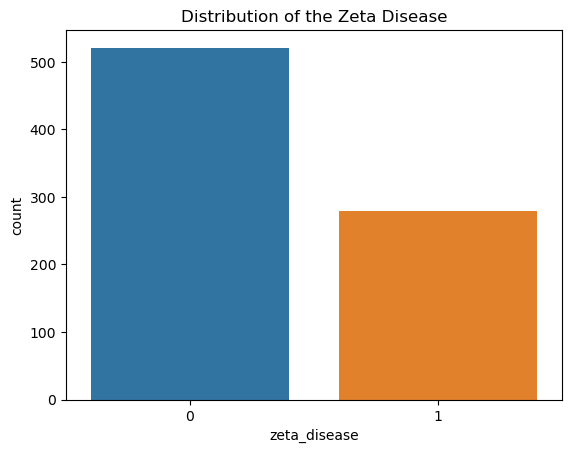

In [851]:
### Visualizing the Disease Distribution for infected vs not infected
sns.countplot(x = 'zeta_disease', data = zeta_train)
plt.title('Distribution of the Zeta Disease')
plt.show()


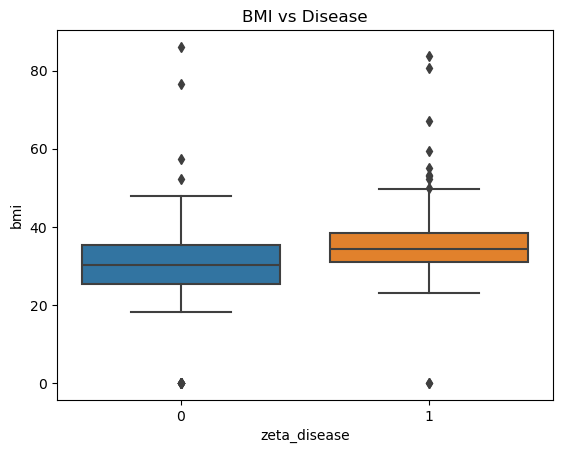

In [852]:
### Exploring the Correlation Between the Features and the likely hood of developing the Zeta Disease

### BMI vs Disease
sns.boxplot(x = 'zeta_disease', y = 'bmi', data = zeta_train) 
plt.title('BMI vs Disease')
plt.show()

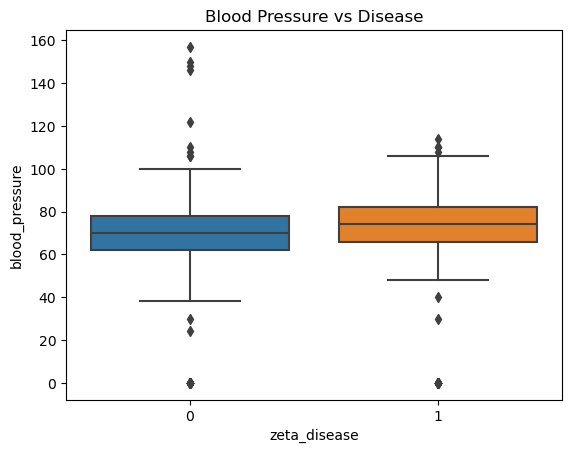

In [853]:
### Blood Preasure vs Disease
sns.boxplot(x = 'zeta_disease', y = 'blood_pressure', data = zeta_train) 
plt.title('Blood Pressure vs Disease')
plt.show()

In [854]:
zeta_train_blood = zeta_train.sort_values(by='blood_pressure', ascending=False)
zeta_train_blood[zeta_train_blood['blood_pressure'] == 0]


,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
451,69,169,19.6,0,0,0.8948,0,2,0
74,25,196,27.5,0,0,0.3028,0,2,1
109,22,188,36.3,0,0,0.9958,0,0,1
112,38,179,38.5,0,0,0.3668,0,2,0
392,22,123,21.1,0,0,0.4048,0,0,0
77,29,150,30.0,0,0,0.5468,0,7,1
447,22,144,0.0,0,0,0.3188,0,0,0
440,20,149,22.2,0,0,0.1708,0,2,0
227,21,155,0.0,0,0,0.3678,0,7,0
68,41,167,33.8,0,0,0.9948,0,0,0


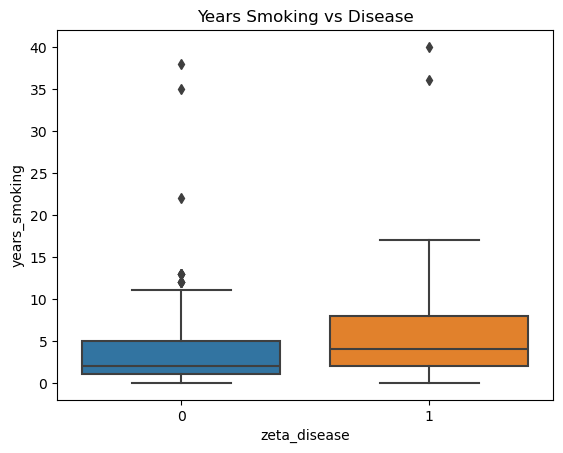

In [855]:
### Years Smoking vs. Zeta Disease
sns.boxplot(x = 'zeta_disease', y = 'years_smoking', data = zeta_train) 
plt.title('Years Smoking vs Disease')
plt.show()

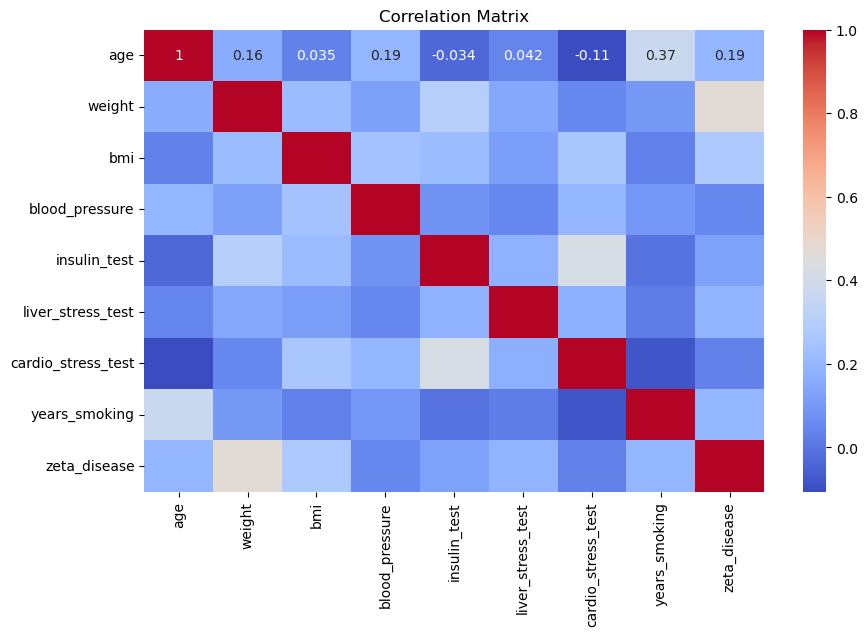

In [856]:
### Creating a Correlation Matrix to explore correlations between features and Zeta Disease 
cor_matrix = zeta_train.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

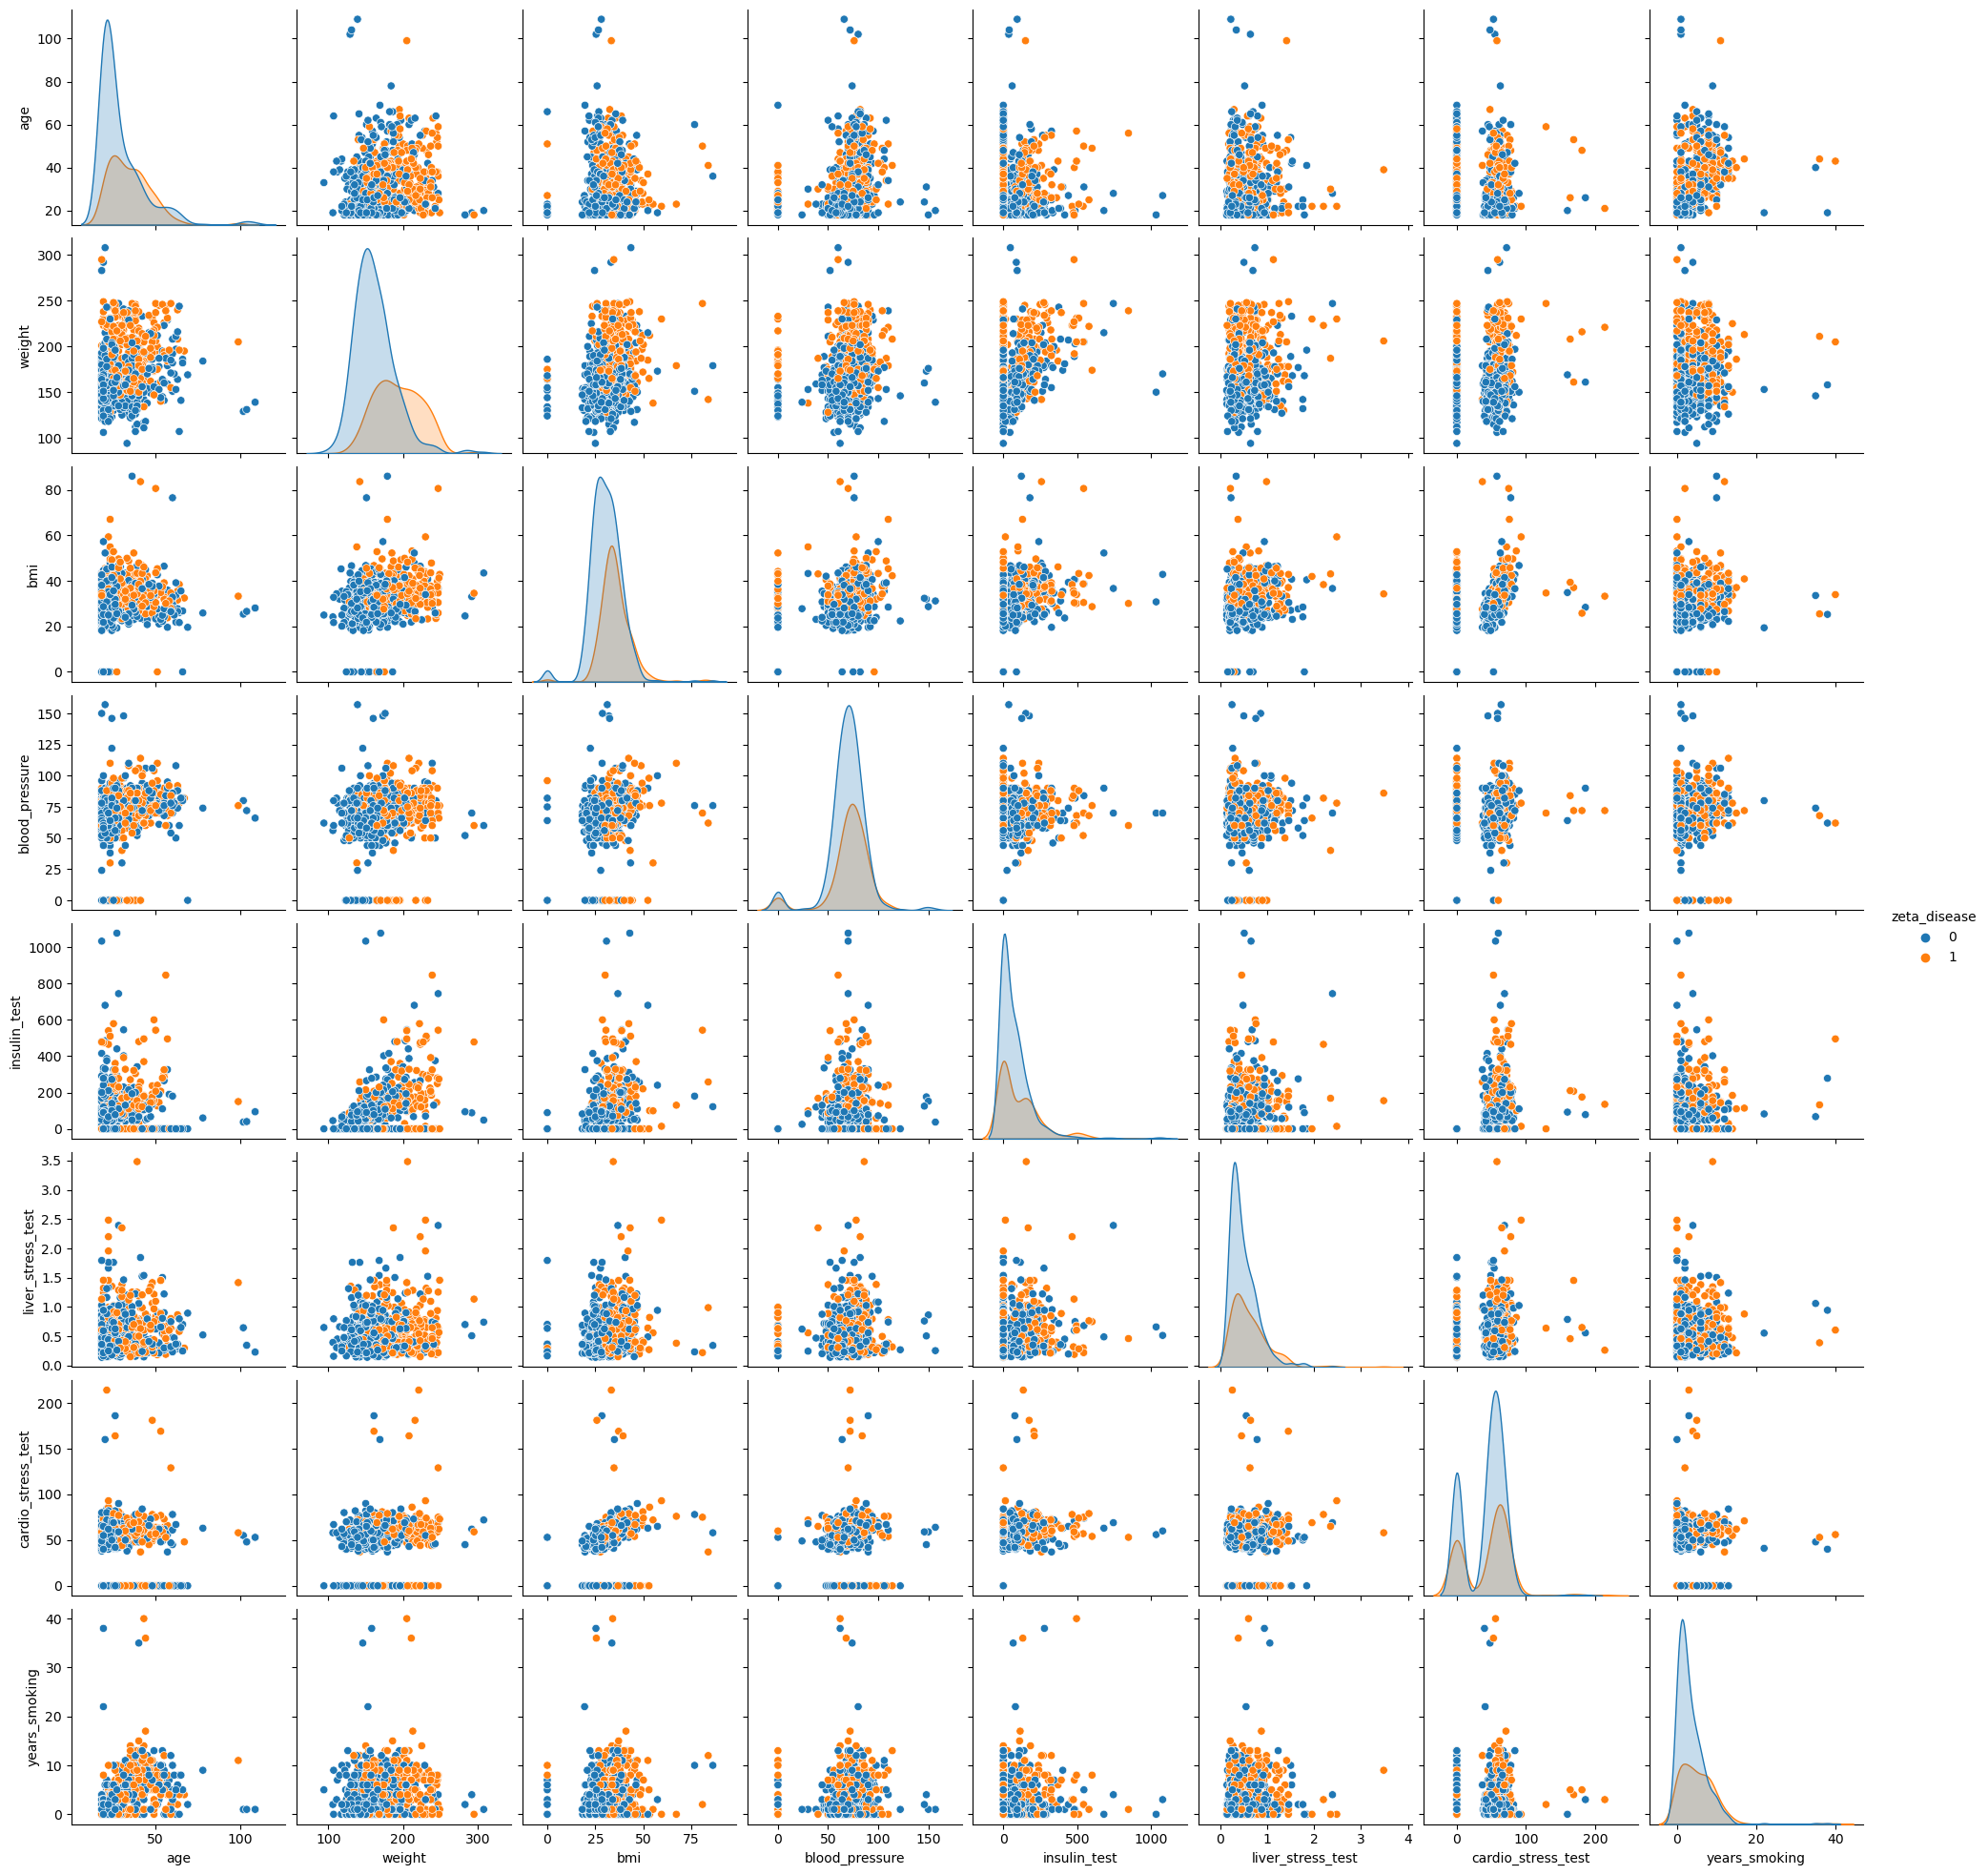

In [857]:
sns.pairplot(zeta_train, hue='zeta_disease')
plt.show()

## Data Quality Issues and Concerns

In [858]:
### Looking into features where values are 0 or considered NULLs in the dataset.
zeta_train_blood = zeta_train.sort_values(by='blood_pressure', ascending=False)
zeta_train_blood[zeta_train_blood['blood_pressure'] == 0]


,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
451,69,169,19.6,0,0,0.8948,0,2,0
74,25,196,27.5,0,0,0.3028,0,2,1
109,22,188,36.3,0,0,0.9958,0,0,1
112,38,179,38.5,0,0,0.3668,0,2,0
392,22,123,21.1,0,0,0.4048,0,0,0
77,29,150,30.0,0,0,0.5468,0,7,1
447,22,144,0.0,0,0,0.3188,0,0,0
440,20,149,22.2,0,0,0.1708,0,2,0
227,21,155,0.0,0,0,0.3678,0,7,0
68,41,167,33.8,0,0,0.9948,0,0,0


In [859]:
### Creating a field "Has_zero" where for the features: blood_pressure, insulin_test and cardio_stress_test that have 0 (or NULL) values. If any of these fields contain 
### a 0, it is considered a NULL value and we want to assign TRUE or FALSE to these rows where they contain missing values. 
zeta_train['has_zero'] = zeta_train[['blood_pressure', 'insulin_test', 'cardio_stress_test']].apply(lambda row: (row == 0).any(), axis=1)
zeta_train['has_zero'].value_counts()

has_zero
False    430
True     370
Name: count, dtype: int64

### From doing some EDA, we conclude with these key points:
#### 1. Missing values: Our features: Blood Pressure, Insulin Test and Cardio Stress Test have missing values where the value is 0 (or NULL). There are a total of 370 rows (little than less of the total data rows: 800) that have missing data values in these columns (features).
#### 2. From our plots and correlation matrix, we can see the highest correlated feature to the zeta_disease is the weight feature.
#### 3. All the features for (X variables) are numeric variables and the target (Y variable), zeta_disease is a categorical variable. We have to digest which model(s) selection are best for numerical variables vs  a categorical variable.

## Data Cleaning and Pre-Processing 


### Splitting the Features and Target:

In [860]:
x = zeta_train.drop(columns='zeta_disease', axis = 1)
y = zeta_train['zeta_disease']

### Splitting into Training and Validation Datasets:

In [861]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

### Since there are some missing values in some of the features, we can use different methods to handle this:
#### 1. Dropping: We can drop these rows where these features have missing values entirely. 
#### 2. Data Imputation: We can look at the distribution of these fields and fill in these missing values with the appropriate measure (mean, median, mode).

### 1. Dropping:
#### We will only drop missing values only from the trainning dataset. We will not drop rows from the validation dataset to reflect real-world situations.

In [862]:
x_train_dropped = x_train[x_train['has_zero'] == False]
x_train_dropped = x_train_dropped.drop('has_zero', axis = 1)
y_train_dropped = y_train[x_train_dropped.index]

print(x_train_dropped.shape)


(347, 8)


In [863]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(640, 9)
(640,)
(160, 9)
(160,)


### 2. Data Imputation: 
#### We will need to look at the distribution of the missing value fields (blood_pressure, insulin_test, and cardio_stress_test) to determine the data imputation technique used

In [864]:
### 2. Zeta Disease with Data imputation for the features: blood_pressure, insulin_test, and cardio_stress_test
x_train_impute = x_train.copy()
x_test_impute = x_test.copy()

x_train_impute[['insulin_test', 'blood_pressure', 'cardio_stress_test']] = x_train_impute[['insulin_test', 'blood_pressure', 'cardio_stress_test']].replace(0, np.nan)
x_test_impute[['insulin_test', 'blood_pressure', 'cardio_stress_test']] = x_test_impute[['insulin_test', 'blood_pressure', 'cardio_stress_test']].replace(0, np.nan)

x_train_impute


,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,has_zero
643,27,170,42.9,70.0,1077.0,0.5148,60.0,3,False
617,27,220,34.5,64.0,225.0,0.4188,67.0,3,False
714,37,161,27.5,70.0,NaN,0.2038,57.0,10,True
397,19,138,28.4,58.0,16.0,0.8288,56.0,2,False
402,19,138,24.8,58.0,54.0,0.3298,41.0,3,False
...,...,...,...,...,...,...,...,...,...
534,18,146,33.2,64.0,87.0,0.3518,57.0,1,False
584,25,196,37.9,70.0,NaN,0.3968,NaN,0,True
493,50,155,23.3,75.0,NaN,0.6228,NaN,2,True
527,25,150,32.9,66.0,90.0,0.9298,50.0,2,False


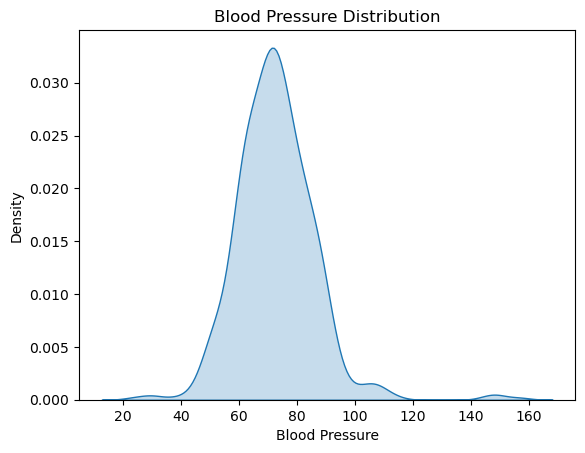

In [865]:
### Looking at the distribution of these features to understand which data imputation technique to use (mean, median, mode)
### Analyzing Blood Pressure Distribution:
sns.kdeplot(x_train_impute['blood_pressure'].dropna(), shade=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure')
plt.show()

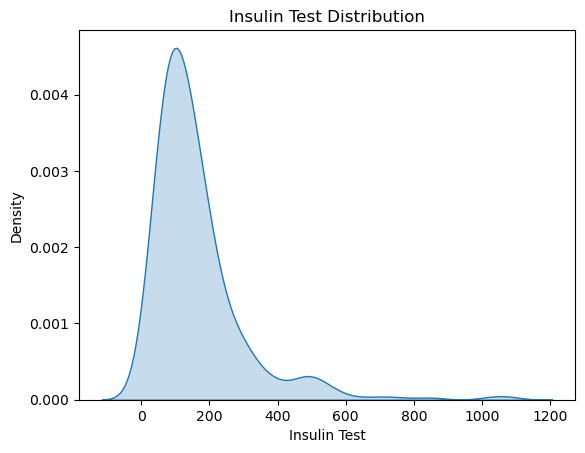

In [866]:
sns.kdeplot(x_train_impute['insulin_test'].dropna(), shade=True)
plt.title('Insulin Test Distribution')
plt.xlabel('Insulin Test')
plt.show()

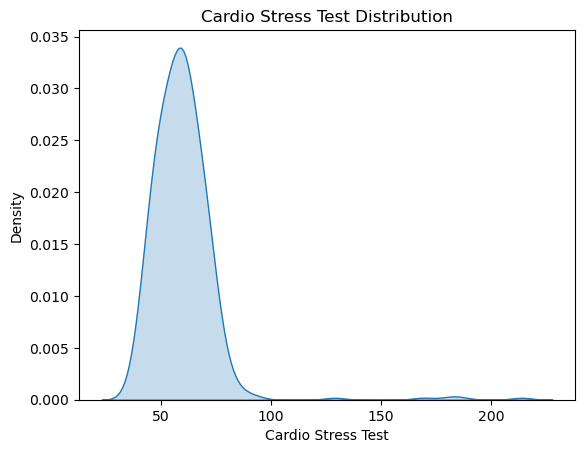

In [867]:
sns.kdeplot(x_train_impute['cardio_stress_test'].dropna(), shade=True)
plt.title('Cardio Stress Test Distribution')
plt.xlabel('Cardio Stress Test')
plt.show()

### We can determine the best imputation techninque based on the distributions above:
#### Blood Pressure: we can see that the distribution is pretty symetrical, so we will use the mean to replace missing (NULL) values. 
#### Insulin Test: We can see that the distribution is slightly skewed right, so it is best to use the median to replace the missing (NULL) values.
#### Cardio Stress Test: We can see that the distribution is somewhat symetircal. There are some slight outliers but, nothing significant. We can use the mean to replace the missing (NULL) values.

In [868]:
### Filling the missing values with mean or median:

### Filling Blood Pressure missing values with the mean:
x_train_impute['blood_pressure'].fillna(x_train_impute['blood_pressure'].mean(), inplace=True)
x_test_impute['blood_pressure'].fillna(x_test_impute['blood_pressure'].mean(), inplace=True)


### Filling Insulin Test missing values with the median:
x_train_impute['insulin_test'].fillna(x_train_impute['insulin_test'].median(), inplace=True)
x_test_impute['insulin_test'].fillna(x_test_impute['insulin_test'].median(), inplace=True)

### Filling Cardio Stress Test with the mean:
x_train_impute['cardio_stress_test'].fillna(x_train_impute['cardio_stress_test'].mean(), inplace=True)
x_test_impute['cardio_stress_test'].fillna(x_test_impute['cardio_stress_test'].mean(), inplace=True)

In [869]:
### Dropping 'Has Zero' column:
x_train_impute = x_train_impute.drop('has_zero', axis = 1)
x_test_impute = x_test_impute.drop('has_zero', axis = 1)
x_test = x_test.drop('has_zero', axis = 1)
x_train = x_train.drop('has_zero', axis = 1)


## Model Training and Selection
#### We will be using a Logistic Regression Model, since we have such a smaller dataset and simpler dataset to interpret. We will be using the two different training datsets to compare which dataset performed better. 

#### We will use two different methods to test which is more effecient:
#### Model 1: Dropping missing values.
#### Model 2: Data Imputation

### Builiding Models on Training Data:

In [870]:
### Model 1. Training the model with our dropped dataset:
model_dropped = LogisticRegression()
model_dropped.fit(x_train_dropped,y_train_dropped)

### Model 2. 
model_impute = LogisticRegression()
model_impute.fit(x_train_impute,y_train)

### Model 3 
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### Evalutating The Models:
##### Accuracy on Training Data:

In [871]:

### Evaluate Model 1 (Dropping missing values)
y_pred_dropped_train = model_dropped.predict(x_train_dropped)
print("Dropped Missing Data Training Accuracy:", accuracy_score(y_train_dropped, y_pred_dropped_train))

### Evaluate Model 2 (Data Imputation)
y_pred_impute_train = model_impute.predict(x_train_impute)
print("Imputed Data Training Accuracy:", accuracy_score(y_train, y_pred_impute_train))

### Evaluate Model 3 
y_pred_train = model.predict(x_train)
print("Accuracy Score: ", accuracy_score(y_train,y_pred_train))

Dropped Missing Data Training Accuracy: 0.7867435158501441
Imputed Data Training Accuracy: 0.7703125
Accuracy Score:  0.7734375


##### Accuracy on Testing Data:

In [872]:
### Evaluate Model 1 (Dropping missing values)
y_pred_dropped_test = model_dropped.predict(x_test)
print("Dropped Missing Data Testing Accuracy:", accuracy_score(y_test, y_pred_dropped_test))

### Evaluate Model 2 (Data Imputation)
y_pred_impute_test = model_impute.predict(x_test_impute)
print("Imputed Data Testing Accuracy:", accuracy_score(y_test, y_pred_impute_test))

### Evaluate Model 3 
y_pred_test = model.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,y_pred_test))

Dropped Missing Data Testing Accuracy: 0.725
Imputed Data Testing Accuracy: 0.75
Accuracy Score:  0.75625


### Understanding Accuracy:
#### Our Training Accuracies are very close to our Testing Accuracies, so we can conclude that our model is not overfitting or underfitting. We also see that our Imputated Data Testing accuracy was slightly higher than the Dropping Missing Data accuracy. We will use the Data Imputation method on our final model when predicting the zeta disease. 


## Final Model Prediction
### We will be using our Model 2 (Data Imputation) method to predict the final outputs of the Zeta Disease Prediction dataset:

In [876]:
### Cleaning the Zeta Field
zeta_pred = zeta_pred.drop('zeta_disease', axis = 1)


### Inputing the model and the zeta disease dataset to output our prediction results:

In [877]:
prediction = model_impute.predict(zeta_pred)
zeta_pred['zeta_disease'] = prediction
zeta_pred

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,1
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,1
9,19,193,25.8,84,66,1.7938,50,3,0


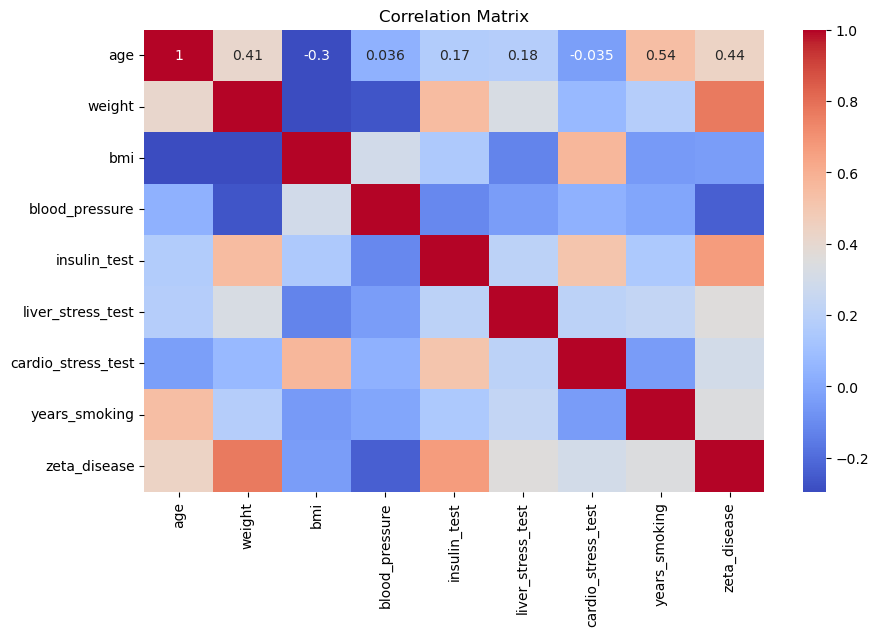

In [878]:
### Showing Correlation between our features and predicted zeta disease. 
cor_matrix = zeta_pred.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Conclusions and Final Notes:
### We can conclude that using our Logistic Regression Model 2 with Data Imputation techniques is the best Model and to best predict the Zeta Disease based on our health features. The correlation Matrix above suggests that 'Weight' and 'Insulin Test' were highly correlated to the predictions of Zeta Disease.

## Notes:

##### 1. I belive we would have a better understanding of how to build the model if we knew more context behind how the data was captured. This would help with handling missing data values and understanding the best way to replace/ drop values in the training dataset.
##### 2. If I had more time and resources, I would have used multiple different models and compared their accuracy. I could have used Random Forest, K-nearest Neighbors, and Gradient Boosting. I would then evaluate the model and use a cross-validation score to help generalize the data. 
##### 3. If I had more time, I would have used feature selection to test out different subsets of the data to better fit the model and predictions.
##### 4. I would like to check if the model is over-fitting or under-fitting the data based on different training and testing datasets. 